## ライブラリ再読み込み ##
+ ライブラリを修正したときにこのノートを実行後、ライブラリのインポートから再実行すると、修正後のライブラリが実行される。

In [26]:
import importlib
import fastf1lib
importlib.reload(fastf1lib)

<module 'fastf1lib' from '/work/fastf1-libs/libs/fastf1lib.py'>

## 初期化 ##
ライブラリをローカルパスから読み込むため、ライブラリのあるディレクトリをパスに追加してから読み込む。

In [27]:
import sys
import importlib
sys.path.append("fastf1_libs")
from fastf1lib import myFastf1

ff1 = myFastf1()

## セッション読み込み ##
指定したセッションを読み込み、オブジェクトを返す。

#### Parameters ####
1. name : string - グランプリ名(国名やサーキット名等、特定できる文字であれば fastf1 側で処理してくれる)
1. year : int - 開催年
1. s : string - セッション(後述)
1. cache : string - キャッシュパス

セッションは以下の文字列を使用するか、数字 (FP1 が 1、FP2 が 2、レースは 5 など) で指定する。
+ Race: 'R'
+ Qualify: 'Q'
+ Sprint：'S'
+ Sprint Shootout： 'SQ'
+ FP1～3: 'FP1', 'FP2', 'FP3'

キャッシュパスは、フォルダが存在しないとエラーになる。
また、相対パスで記述する場合は、ライブラリではなく、呼び出す側のファイルとの相対パスで指定すること。

#### Returns ####
セッションオブジェクト
(後続の処理で使用する)

In [28]:
session_race = ff1.load_session_o(
    name="mexico", 
    year=2023, 
    s='R',
    cache='/work/fastf1/cache/'
    )
session_qual = ff1.load_session_o(
    name="mexico", 
    year=2023, 
    s='Q',
    cache='/work/fastf1/cache/'
    )


core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.1.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '16', '55', '4', '63', '3', '81', '23', '31', '10', '22', '27', '24', '77', '2', '18', '14', '20', '11']
core           INFO 	Loading data for Mexico City Grand Pr

## コーナーの速度差を計算 ##
#### Parameters ####
1. session : session - セッションオブジェクト
1. driver1 : string - ドライバー名(3文字略称)
1. driver2 : string - ドライバー名(3文字略称)
1. min_dist : int - 表示開始の距離
1. max_dist : int - 表示終了の距離

#### コーナーの距離を表示する方法 ####
circuit_info = session_qual.get_circuit_info()  
circuit_info.corners

In [12]:
circuit_info = session_qual.get_circuit_info()
circuit_info.corners

,X,Y,Number,Letter,Angle,Distance
0,11549.390625,-620.416504,1,,26.961071,1198.506810
1,11579.570557,-1334.711426,2,,-161.456631,1269.579602
2,11984.500977,-1769.020264,3,,26.924667,1328.015427
3,8811.018692,-7835.065430,4,,-166.079314,2027.726312
4,9258.899475,-8332.687500,5,,-0.292552,2098.948243
5,8180.223450,-9021.795898,6,,-109.046015,2236.782611
6,8337.142670,-5797.260254,7,,25.060337,2567.265893
7,7521.641602,-5024.284180,8,,-141.619777,2676.169383
8,7078.690796,-4423.575684,9,,50.280962,2750.298778
9,5329.669922,-3929.691406,10,,-128.913482,2944.903880


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


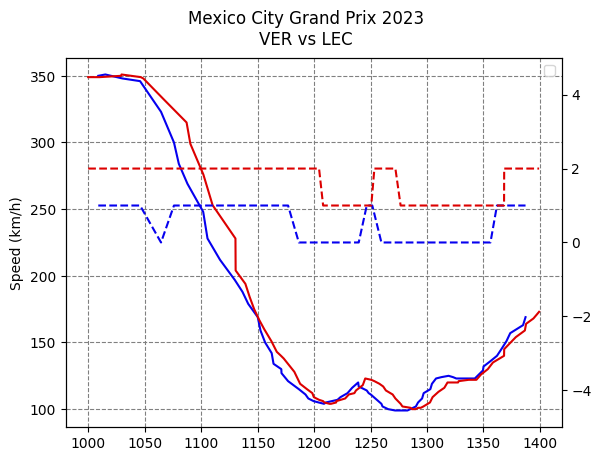

In [20]:
ff1.cornerspeed_compare(
    session=session_qual,
    driver1='VER',
    driver2='LEC',
    min_dist=1000,
    max_dist=1400
)

## 2ドライバーのテレメトリーデータ比較 ##
ドライバーの指定は、3文字省略形、またはカーナンバー

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. driver1 : string
    ドライバー1
1. driver2 : string
    ドライバー2

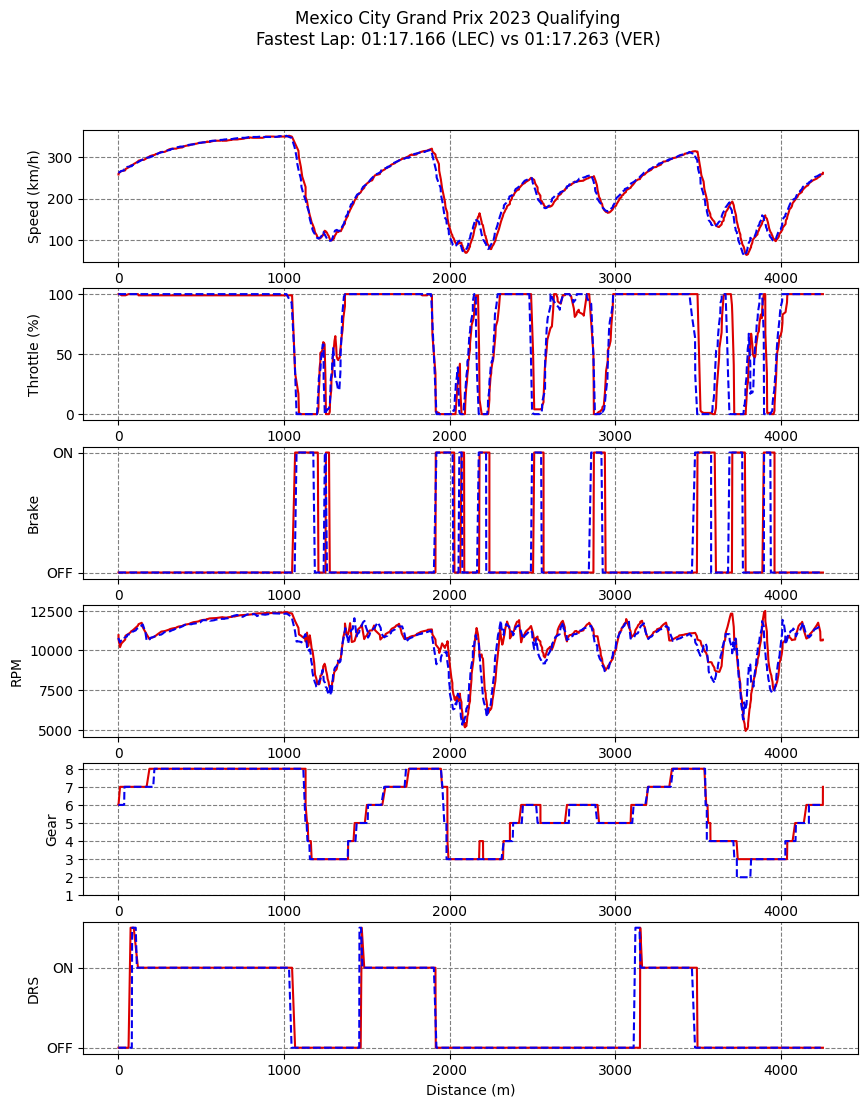

In [3]:
ff1.datachart_compare(
    session=session_qual,
    driver1='LEC',
    driver2='VER'
    )

## 複数ドライバーのラップタイム推移を比較 ##
ドライバーリストは、[] で囲んで , で区切って記載する。  
ドライバーリストの最初に指定したドライバーを基準タイム(0の線)として表示する。

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. drivers : [string]
    ドライバーのリスト

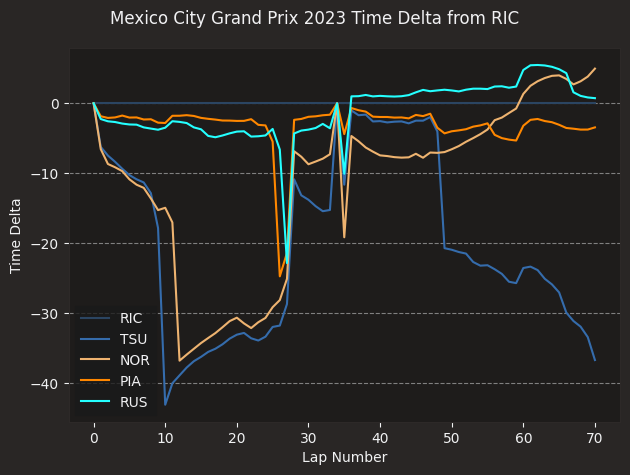

In [4]:
ff1.deltatime_comperition(
    session=session_race,
    drivers=['3', '22', '4', '81', '63']
    )

## ドライバーのラップタイム一覧 ##
タイヤコンパウントで色分けしてラップタイムをプロットする。  

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. driver : string
    ドライバー名を3文字略称で指定

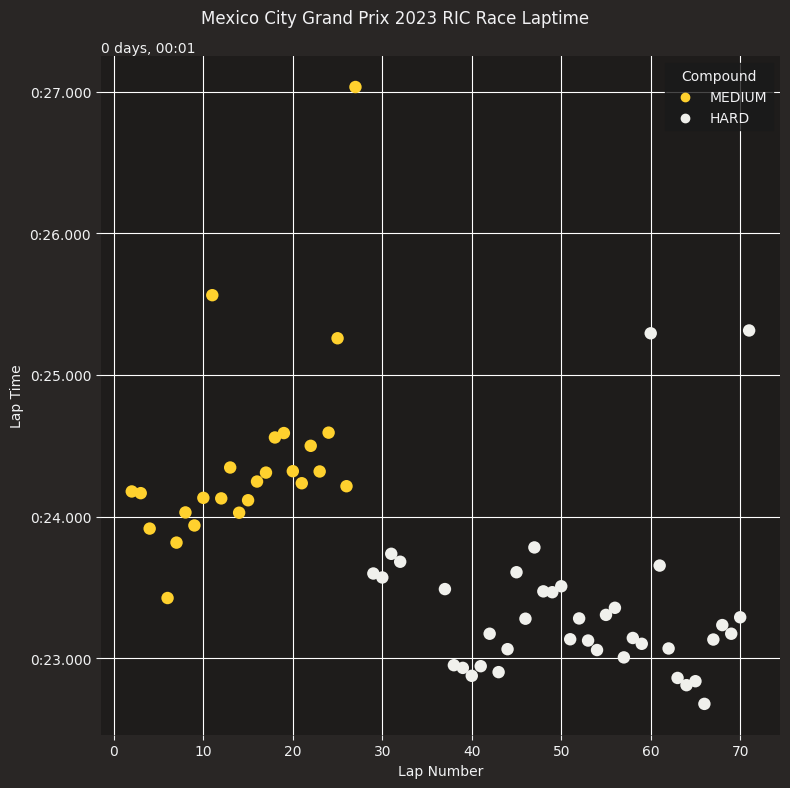

In [5]:
ff1.driver_laptime(
    session=session_race,
    driver='RIC'
    )

## 平均タイムとのタイム差 ##
ドライバーリストは [] で囲んで , で区切って記載する。  
ドライバーリストの先頭の平均ラップタイムを 0 とする。  
セーフティーカー先導等、遅いラップを挟むと平均値が上手く計算できない。赤旗中断を挟むと意図したグラフにならない。

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. drivers : [string]
    プロットするドライバーをリスト形式で指定
1. min_sec : int
    y 軸の上端値
1. max_sec : int
    y 軸の下端値
1. lap_num : int
    描写を開始する周回数。初期値:0

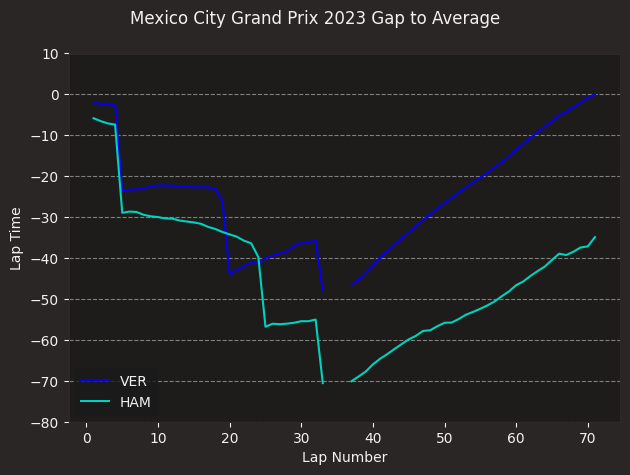

In [7]:
ff1.gap_to_average(
    session=session_race,
    drivers=[1, 44],
    min_sec=10,
    max_sec=-80,
    lap_num=0
    )

## 各ドライバーのラップタイム推移 ##
ドライバーリストは [] で囲んで , で区切って記載する。  

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. drivers : [string]
    プロットするドライバーをリスト形式で指定
1. min_sec : int
    y 軸の上端値(秒数で指定)
1. max_sec : int
    y 軸の下端値(秒数で指定)

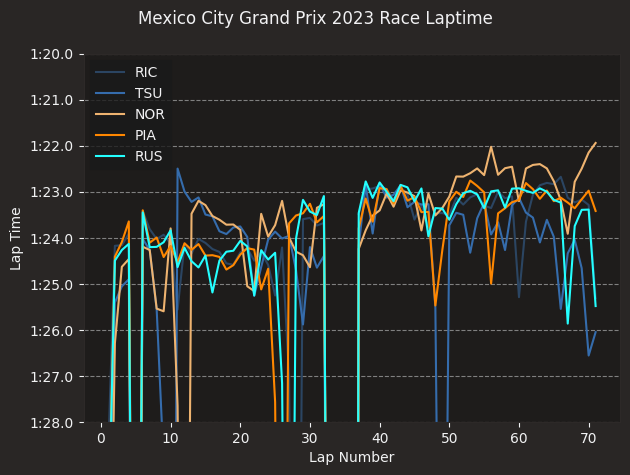

In [9]:
ff1.laptime_comperition(
    session=session_race,
    drivers=['3', '22', '4', '81', '63'],
    min_sec=80,
    max_sec=88
    )

## 各ドライバーのラップタイムの出現範囲をプロット ##
上位10名について表示する。  

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト

KeyError: 0

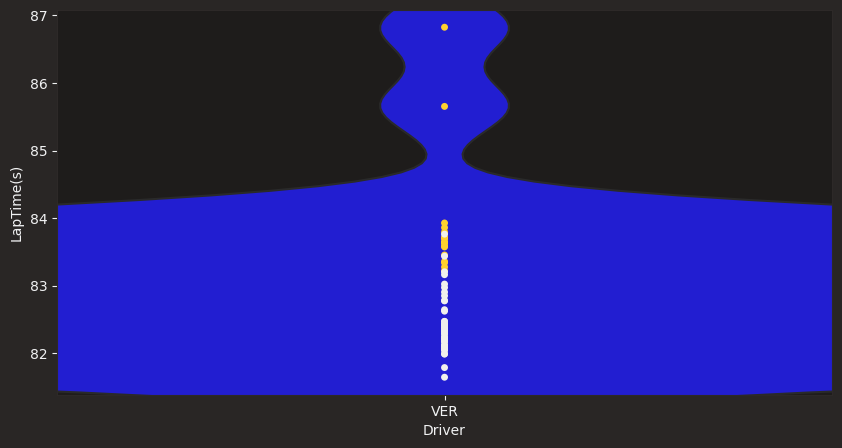

In [13]:
ff1.laptime_distribution(
    session=session_race
    )

## ミニセクターごとにドライバー比較 ##
ミニセクター区切りは、最初に 0 を入れること。  
最後はラップ終わりにする必要はない。最後に指定した値から、ラップ最後までが最後のミニセクターになる。  
等間隔で区切った値を使う場合は、以下のコードを参考に計算して引数で渡すことが可能。

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. driver1 : string
    ドライバー1。
1. driver2 : string
    ドライバー2。
1. minisectors : [int]
    ミニセクターの距離をリストで指定。

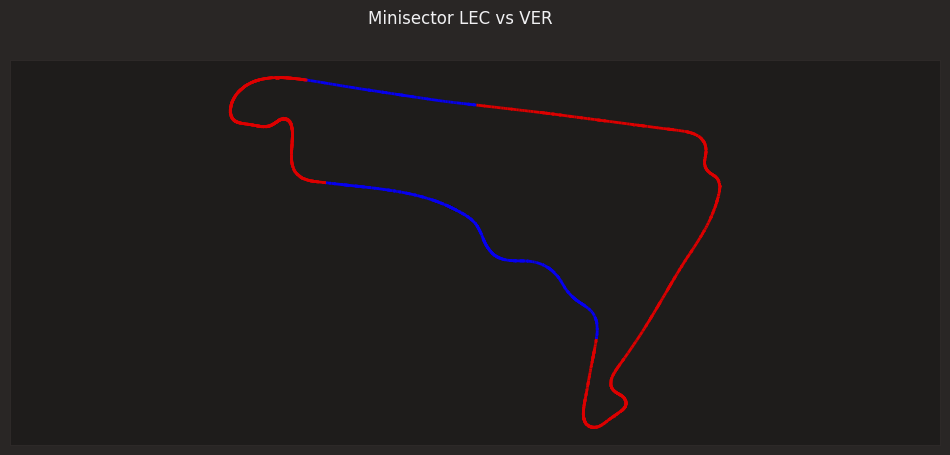

In [21]:
# 等分でミニセクターを区切る場合
laps = session_qual.laps.pick_driver('LEC').pick_fastest()
laps_tel = laps.get_telemetry().add_distance()
max(laps_tel['Distance'])

num_minisectors = 25

total_distance = max(laps_tel['Distance'])

minisector_length = total_distance / num_minisectors

minisectors = [0]

for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

minisectors

# 手動で指定する場合
minisectors = [0,1000,2000,3000,4000]

ff1.minisector_compare(
    session=session_qual,
    driver1='LEC',
    driver2='VER',
    minisectors=minisectors
    )

## セッション中のポジション推移 ##

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト

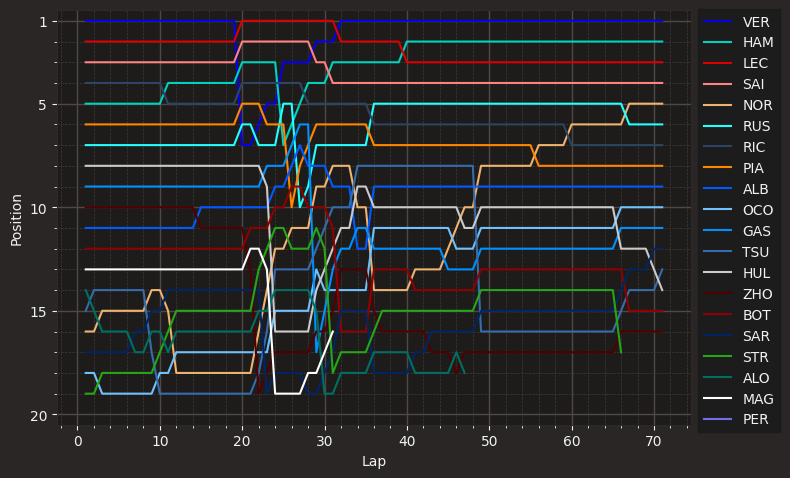

In [22]:
ff1.position_changes(
    session=session_race
    )

## 予選のパフォーマンス差 ##

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト

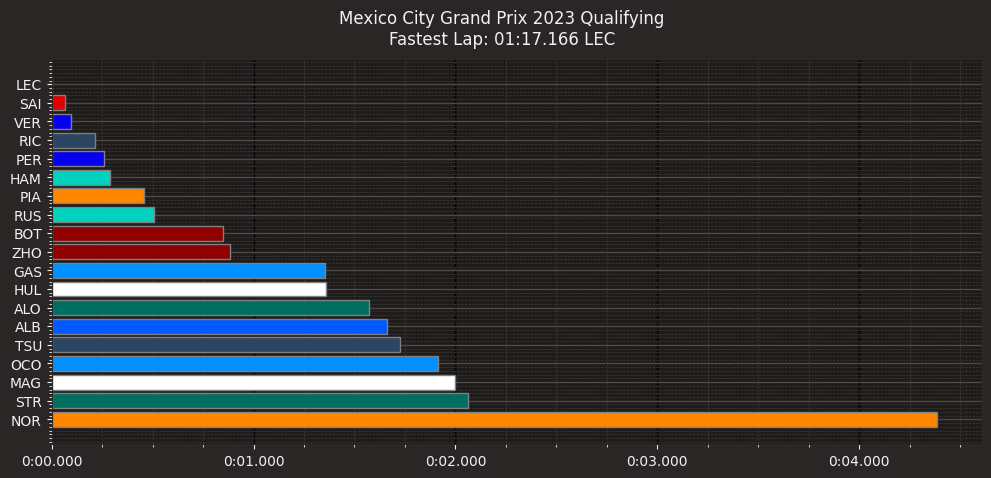

In [23]:
ff1.quali_result(
    session=session_qual
    )

## スリック vs レインの色付け ##
セッション中に雨が降った時に、ミニセクターごとにスリックタイヤとレインタイヤで早いほうを色付けする。

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. target_lap : int
    比較する周回

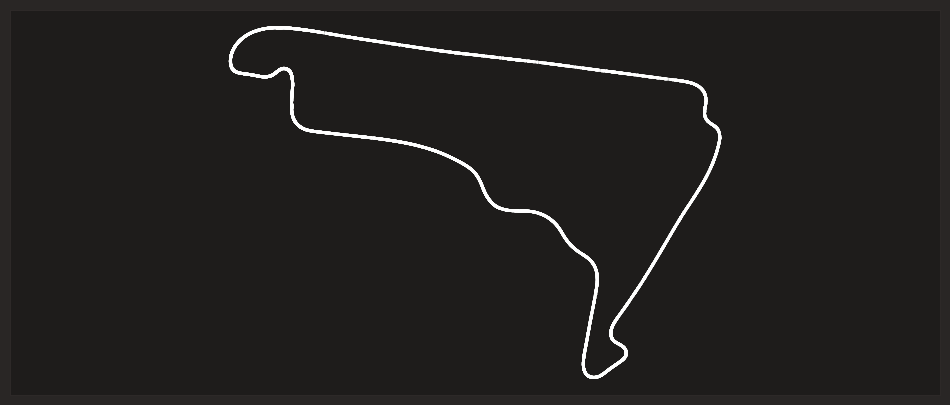

In [24]:
ff1.slick_vs_wet(
    session=session_race,
    target_lap=51
    )

## 2ドライバーの速度比較 ##

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. driver1 : string
    ドライバー1
1. driver2 : string
    ドライバー2

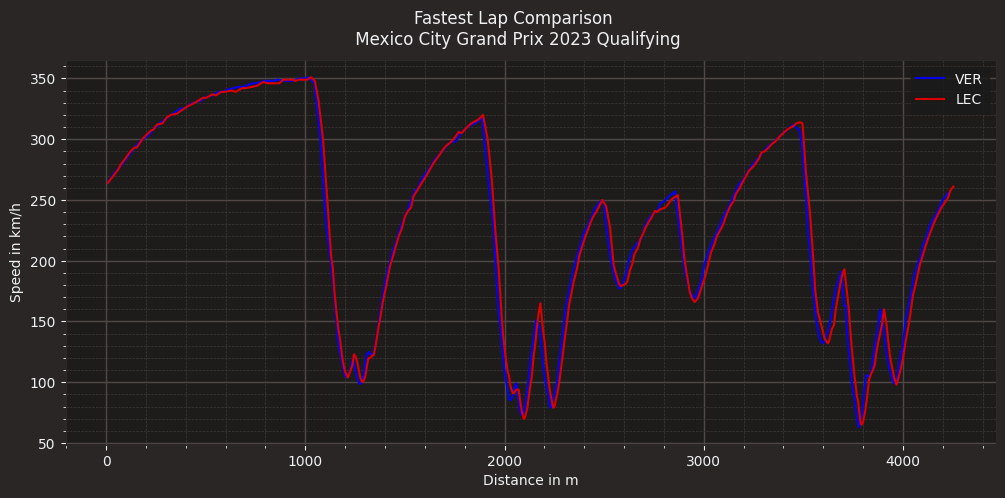

In [29]:
ff1.speed_compare(
    session=session_qual,
    driver1='VER',
    driver2='LEC'
    )

## 1 ラップの速度をグラフ化(コーナー位置あり) ##
#### Parameters ####
1. session : session - セッションオブジェクト

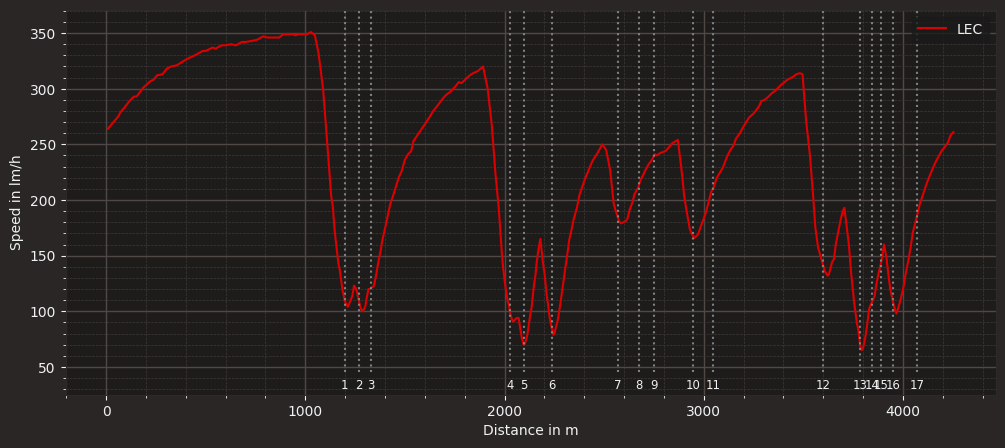

In [22]:
ff1.speed_traces(
    session=session_qual
    )

## 最高速度のヒートマップ ##

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. datanum : int
    データ個数
1. vmin : int
    最小速度

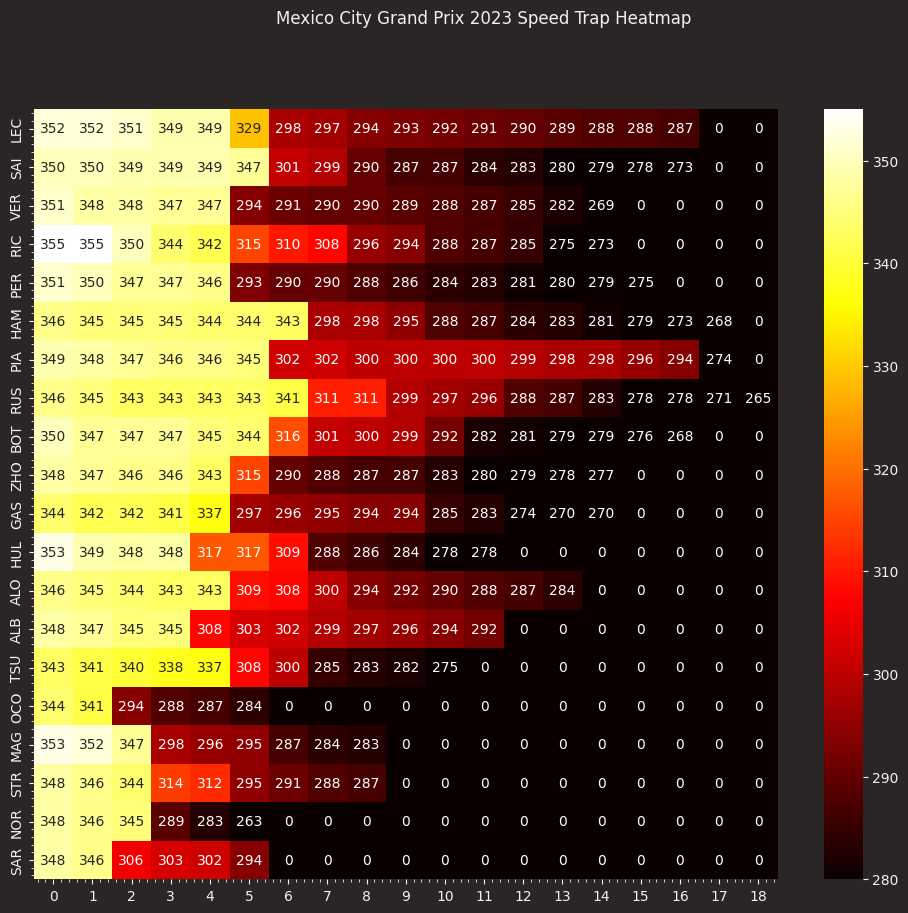

In [30]:
ff1.speedtrap_heatmap(
    session=session_qual,
    datanum=20,
    vmin=280
    )

## チームごとのパフォーマンス差 ##

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト

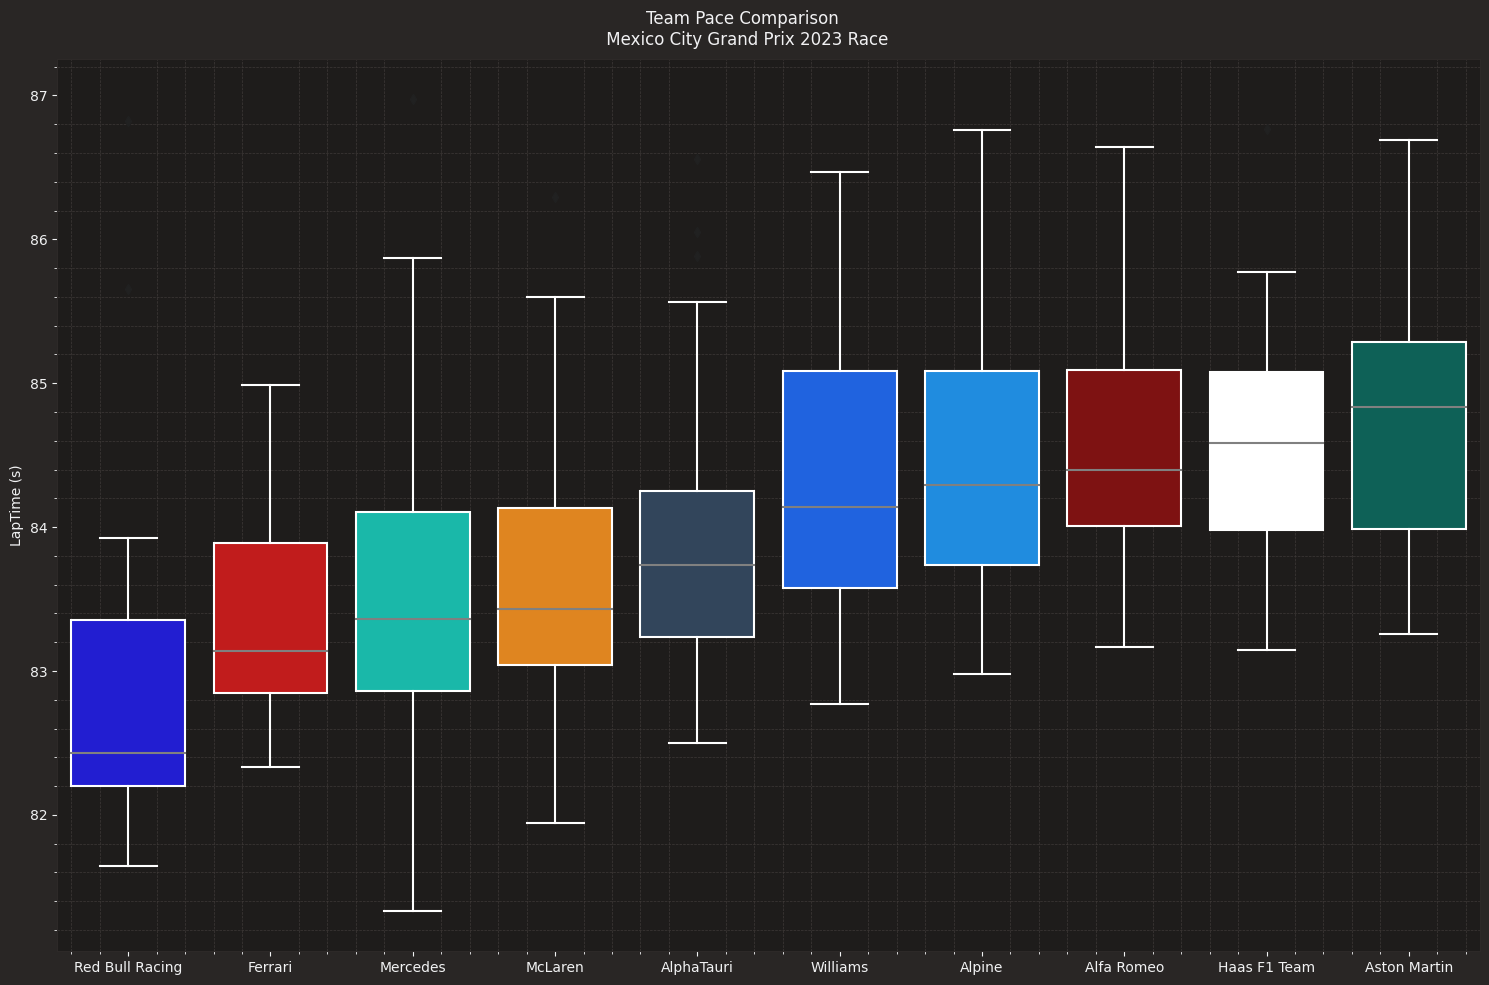

In [31]:
ff1.team_comparison(
    session=session_race
    )

## タイヤ使用履歴 ##

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト

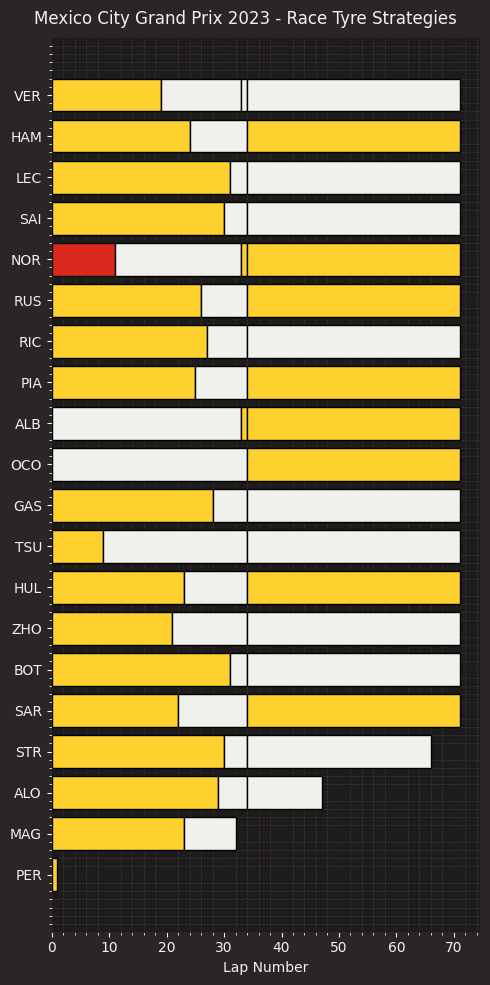

In [32]:
ff1.tyre_strategies(
    session=session_race
    )